In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [114]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
from ucimlrepo import fetch_ucirepo

#Fetch dataset
adult = fetch_ucirepo(id=2)

#Data as pandas dataframes
X = adult.data.features
y = adult.data.targets

#Convert NumPy arrays to pandas DataFrame
X_df = pd.DataFrame(X, columns=adult.data.feature_names)
y_df = pd.DataFrame(y, columns=['income'])

#Concatenate features and target into a single DataFrame
df = pd.concat([X_df, y_df], axis=1)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [6]:
df.shape

(48842, 15)

Check for null values within the dataset



In [7]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

The columns "workclass," "occupation," and "native-country" contain missing values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
#Display unique values in each column
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support

Replace '?' with NaN in the 'workclass', 'occupation', and 'nativecountry' columns.

Update '<=50K.' to '<=50K' and '>50K.' to '>50K' in the 'income' column.

In [10]:
#Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [11]:
#Replace values in 'income' column
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [12]:
#Check the unique values in each column of the dataset after the adjustments
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' na

# Handling null values

In [13]:
#Number NaN values in each row of the dataset
nan_rows_count = df.isna().sum(axis=1)

#Total number of rows in the dataset that contain NaN values
total_nan_rows = (nan_rows_count > 0).sum()

print("Total number of rows contain NaN values:", total_nan_rows)


Total number of rows contain NaN values: 3620


In [14]:
#Non-Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Handle Null values of data in the 'workclass' column

In [16]:
#Classes of income
print(df['income'].unique())

['<=50K' '>50K']


In [19]:
#Divide the dataset into two categories based on income
incomelessthan50 = df[df['income'] == '<=50K']
incomegreaterthan50 = df[df['income'] == '>50K']

In [20]:
incomelessthan50.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
incomegreaterthan50.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [22]:
#Subset the 'workclass' column according to income
lessthan50workclass = incomelessthan50['workclass'].value_counts()
greaterthan50workclass = incomegreaterthan50['workclass'].value_counts()

In [23]:
lessthan50workclass

Private             26519
Self-emp-not-inc     2785
Local-gov            2209
State-gov            1451
Federal-gov           871
Self-emp-inc          757
Without-pay            19
Never-worked           10
Name: workclass, dtype: int64

In [24]:
greaterthan50workclass

Private             7387
Self-emp-not-inc    1077
Self-emp-inc         938
Local-gov            927
Federal-gov          561
State-gov            530
Without-pay            2
Name: workclass, dtype: int64

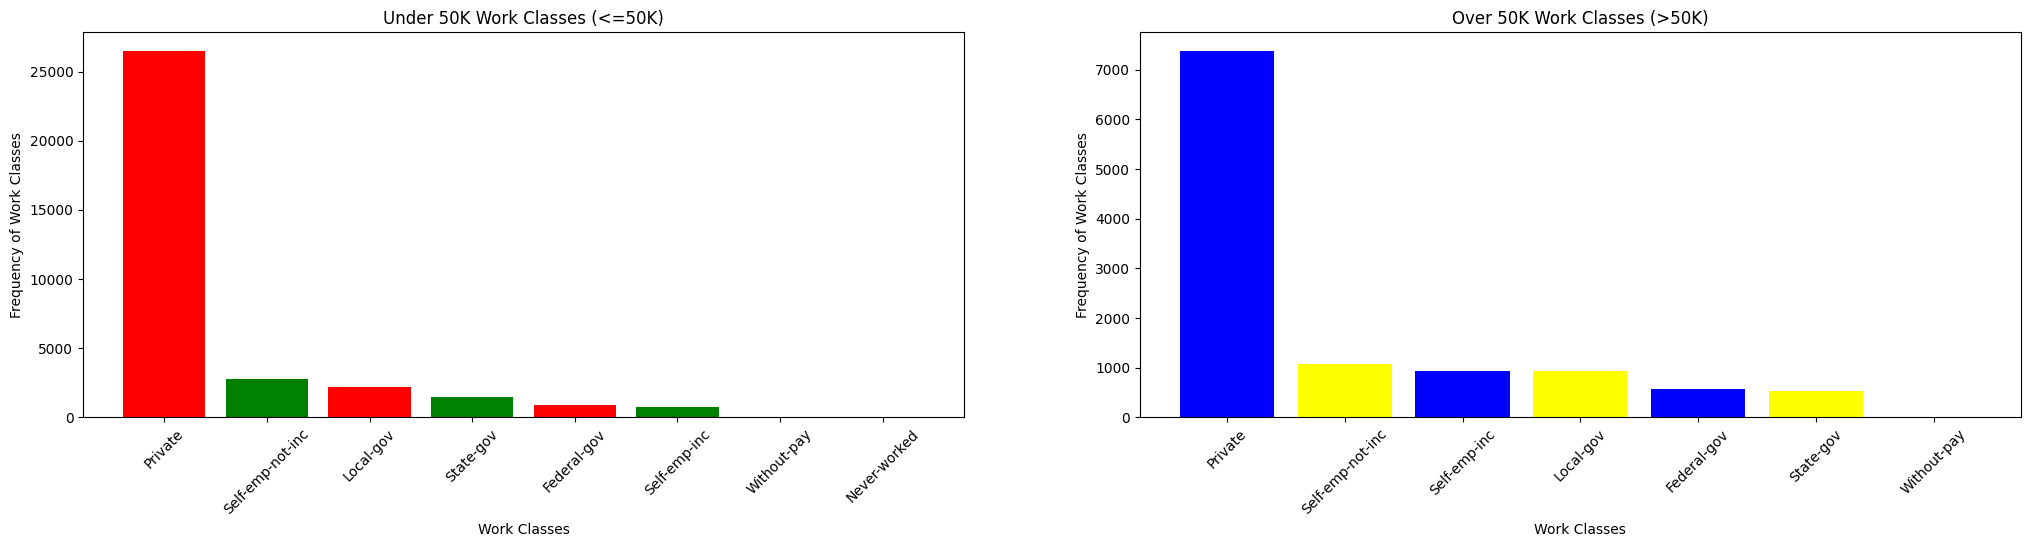

In [25]:
#Plot Work classes according to the Income classes
lessthan50_color = ['red', 'green']
greaterthan50_color = ['blue', 'yellow']

#Plotting them side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25,5))

ax1.bar(lessthan50workclass.index,lessthan50workclass.values,color=lessthan50_color)
ax1.set_xlabel("Work Classes")
ax1.set_ylabel("Frequency of Work Classes")
ax1.set_title("Under 50K Work Classes (<=50K)")
ax1.tick_params(axis='x', rotation=45)

ax2.bar(greaterthan50workclass.index,greaterthan50workclass.values,color=greaterthan50_color)
ax2.set_xlabel("Work Classes")
ax2.set_ylabel("Frequency of Work Classes")
ax2.set_title("Over 50K Work Classes (>50K)")
ax2.tick_params(axis='x', rotation=45)

In [28]:
#Find mode of 'workclass' column for each income class
modelessthan50workclass = incomelessthan50['workclass'].mode()[0]
modegreaterthan50workclass = incomegreaterthan50['workclass'].mode()[0]
print('Mode Less than 50k income:', modelessthan50workclass)
print('Mode Greater than 50k income:', modegreaterthan50workclass)

Mode Less than 50k income: Private
Mode Greater than 50k income: Private


In [29]:
#Fill missing values in 'workclass' column based on income class
df.loc[(df['income'] == '<=50K') & (df['workclass'].isnull()), 'workclass'] = modelessthan50workclass
df.loc[(df['income'] == '>50K') & (df['workclass'].isnull()), 'workclass'] = modegreaterthan50workclass

Check if 'workclass' column has been successfully handled

In [30]:
print(df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


 'workclass' column is now free from any missing values

#Handle Null values in the 'occupation' column

In [32]:
#Filter Occupation' column according to income
lessthan50occupation = incomelessthan50['occupation'].value_counts()
greaterthan50occupation = incomegreaterthan50['occupation'].value_counts()

In [33]:
lessthan50occupation

Adm-clerical         4843
Craft-repair         4729
Other-service        4719
Sales                4029
Prof-specialty       3388
Exec-managerial      3178
Machine-op-inspct    2650
Handlers-cleaners    1934
Transport-moving     1874
Farming-fishing      1317
Tech-support         1026
Protective-serv       675
Priv-house-serv       239
Armed-Forces           10
Name: occupation, dtype: int64

In [34]:
greaterthan50occupation

Exec-managerial      2908
Prof-specialty       2784
Sales                1475
Craft-repair         1383
Adm-clerical          768
Transport-moving      481
Tech-support          420
Machine-op-inspct     372
Protective-serv       308
Other-service         204
Farming-fishing       173
Handlers-cleaners     138
Armed-Forces            5
Priv-house-serv         3
Name: occupation, dtype: int64

Plot occupations according to the income

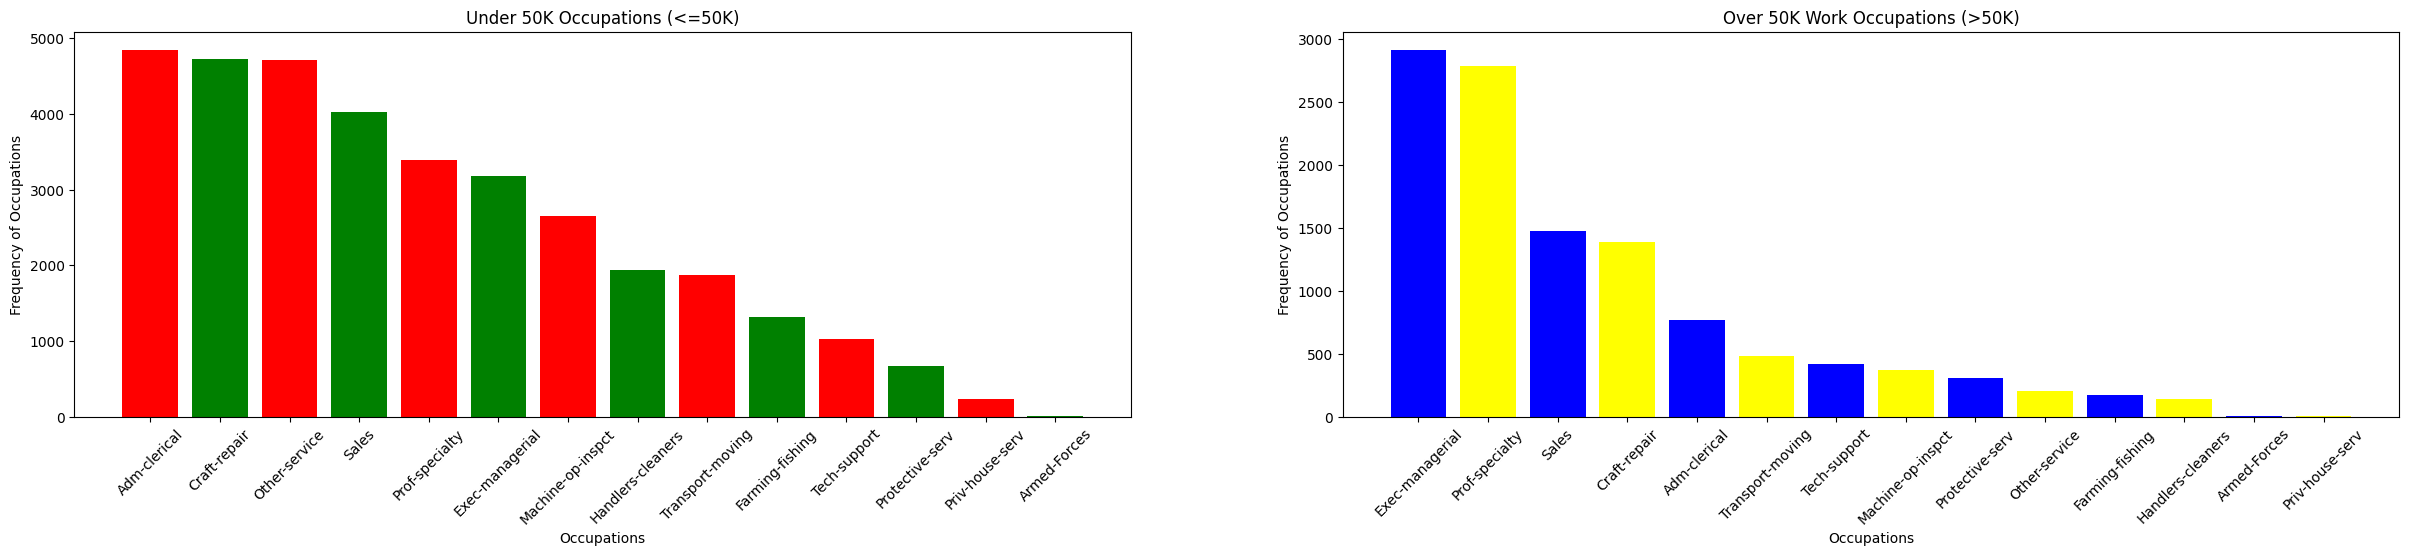

In [35]:
#colors
lessthan50color = ['red', 'green']
greaterthan50color = ['blue', 'yellow']

#Plotting them side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,5))

ax1.bar(lessthan50occupation.index,lessthan50occupation.values,color=lessthan50color)
ax1.set_xlabel("Occupations")
ax1.set_ylabel("Frequency of Occupations")
ax1.set_title("Under 50K Occupations (<=50K)")
ax1.tick_params(axis='x', rotation=45)


ax2.bar(greaterthan50occupation.index,greaterthan50occupation.values,color=greaterthan50color)
ax2.set_xlabel("Occupations")
ax2.set_ylabel("Frequency of Occupations")
ax2.set_title("Over 50K Work Occupations (>50K)")
ax2.tick_params(axis='x', rotation=45)

In [36]:
#Find Occupation mode for each income class
modelessyhan50koccupation = incomelessthan50['occupation'].mode()[0]
modegreaterthan50koccupation = incomegreaterthan50['occupation'].mode()[0]
print('Mode of Less than 50k income:', modelessyhan50koccupation)
print('Mode of Greater than 50k income:', modegreaterthan50koccupation)

Mode of Less than 50k income: Adm-clerical
Mode of Greater than 50k income: Exec-managerial


In [37]:
#Fill missing values in 'occupation' column based on income class
df.loc[(df['income'] == '<=50K') & (df['occupation'].isnull()), 'occupation'] = modelessyhan50koccupation
df.loc[(df['income'] == '>50K') & (df['occupation'].isnull()), 'occupation'] = modegreaterthan50koccupation

Check if 'occupation' column has been successfully handled

In [38]:
print(df['occupation'].unique())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


'Occupation' is now free from any missing values

# Handle Null values in 'native-country' column

In [40]:
#Find the 'native-country' column based on income
lesstahn50nativecountry = incomelessthan50['native-country'].value_counts()
greaterthan50nativecountry = incomegreaterthan50['native-country'].value_counts()

In [41]:
lesstahn50nativecountry

United-States                 33138
Mexico                          904
Philippines                     210
Puerto-Rico                     164
Germany                         148
El-Salvador                     144
Canada                          119
Cuba                            104
Dominican-Republic               98
South                            95
Jamaica                          91
India                            89
China                            86
Guatemala                        85
Columbia                         81
England                          80
Vietnam                          79
Italy                            71
Poland                           70
Haiti                            66
Japan                            60
Portugal                         55
Nicaragua                        46
Peru                             42
Ecuador                          39
Taiwan                           39
Iran                             37
Greece                      

In [42]:
greaterthan50nativecountry

United-States                 10694
Philippines                      85
Canada                           63
India                            62
Germany                          58
Mexico                           47
England                          47
China                            36
Cuba                             34
Italy                            34
Japan                            32
Taiwan                           26
Iran                             22
South                            20
Puerto-Rico                      20
Greece                           18
Poland                           17
France                           16
Jamaica                          15
Portugal                         12
El-Salvador                      11
Ireland                          11
Haiti                             9
Cambodia                          9
Yugoslavia                        8
Hong                              8
Vietnam                           7
Hungary                     

In [43]:
#Create cross-tabulation
cross_tab = pd.crosstab(df['native-country'], df['income'])

#Display cross-tabulation
print(cross_tab)

income                      <=50K   >50K
native-country                          
Cambodia                       19      9
Canada                        119     63
China                          86     36
Columbia                       81      4
Cuba                          104     34
Dominican-Republic             98      5
Ecuador                        39      6
El-Salvador                   144     11
England                        80     47
France                         22     16
Germany                       148     58
Greece                         31     18
Guatemala                      85      3
Haiti                          66      9
Holand-Netherlands              1      0
Honduras                       18      2
Hong                           22      8
Hungary                        13      6
India                          89     62
Iran                           37     22
Ireland                        26     11
Italy                          71     34
Jamaica         

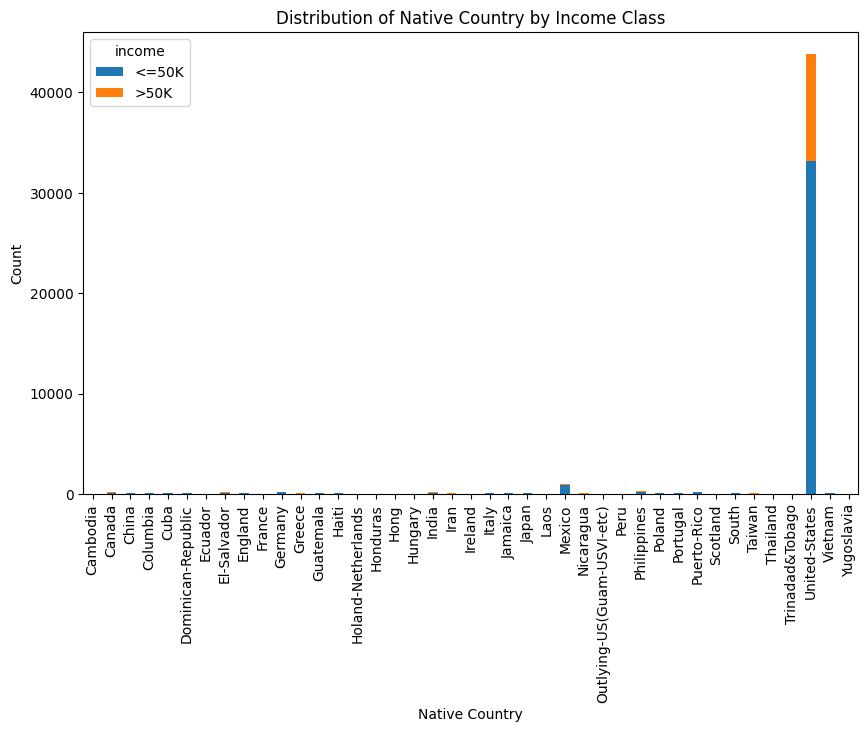

In [44]:
#Plot cross-tabulation using a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Native Country by Income Class')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Plot distribution of native_countries across different income classes

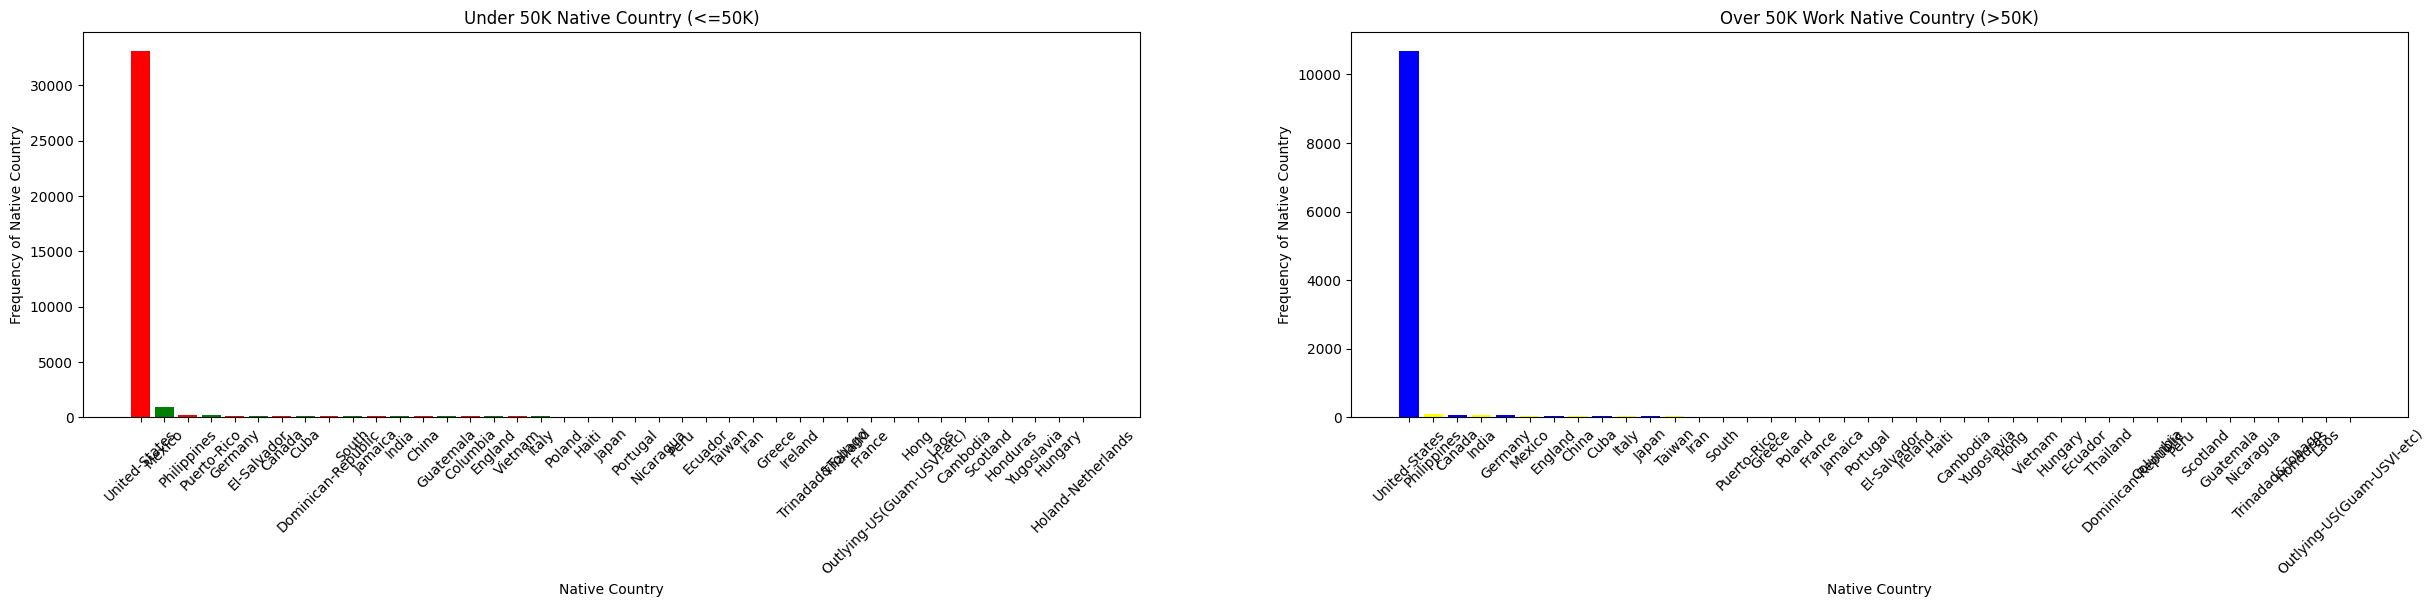

In [46]:
#Colors
lessthan50color = ['red', 'green']
greater50color = ['blue', 'yellow']

#Plot them side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,5))

ax1.bar(lesstahn50nativecountry.index,lesstahn50nativecountry.values,color=lessthan50color)
ax1.set_xlabel("Native Country")
ax1.set_ylabel("Frequency of Native Country")
ax1.set_title("Under 50K Native Country (<=50K)")
ax1.tick_params(axis='x', rotation=45)

ax2.bar(greaterthan50nativecountry.index,greaterthan50nativecountry.values,color=greater50color)
ax2.set_xlabel("Native Country")
ax2.set_ylabel("Frequency of Native Country")
ax2.set_title("Over 50K Work Native Country (>50K)")
ax2.tick_params(axis='x', rotation=45)

In [48]:
#Find total number of occurrences of "United-States"
us_count = df['native-country'].value_counts().get('United-States', 0)

#Find total count of entries in "native-country" column
total_entries = len(df)

#Calculate percentage
us_percentage = (us_count / total_entries) * 100

print("Percentage of 'United-States' in native-country column:", us_percentage)

Percentage of 'United-States' in native-country column: 89.74243478973015


In [49]:
df['native-country'] = df['native-country'].fillna('United-States')

Check if 'native-country' column has been successfully handled

In [50]:
#Check unique values of workclass column
print(df['native-country'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


All null values are filled

#Remove rows that are exact duplicates

In [52]:
#Number of rows and columns in DataFrame before removing duplicates
df.shape

(48842, 15)

In [53]:
#Check number of duplicate rows in the DataFrame
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows :", duplicate_rows)

Number of duplicate rows : 53


Keep only the first occurrence of duplicates and remove the rest.

Perform the operation directly on the DataFrame

In [54]:
df.drop_duplicates(keep='first', inplace=True)

In [208]:
#Number of rows and columns in DataFrame after removing duplicates
df.shape

(48789, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       48789 non-null  object
 2   fnlwgt          48789 non-null  int64 
 3   education       48789 non-null  object
 4   education-num   48789 non-null  int64 
 5   marital-status  48789 non-null  object
 6   occupation      48789 non-null  object
 7   relationship    48789 non-null  object
 8   race            48789 non-null  object
 9   sex             48789 non-null  object
 10  capital-gain    48789 non-null  int64 
 11  capital-loss    48789 non-null  int64 
 12  hours-per-week  48789 non-null  int64 
 13  native-country  48789 non-null  object
 14  income          48789 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


#Standardizing Data

In [60]:
#Check unique values before Standardizing Data
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay' 'never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']


occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'prote

In [61]:
#Change all categorical variables to lowercase, remove any leading or trailing whitespaces
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for column in categorical_columns:
    df[column] = df[column].str.lower().str.strip()

In [62]:
#Check unique values after Standardizing Data
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay' 'never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']


occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'prote

# Check correlations between Neumeric values and Income column

<Axes: >

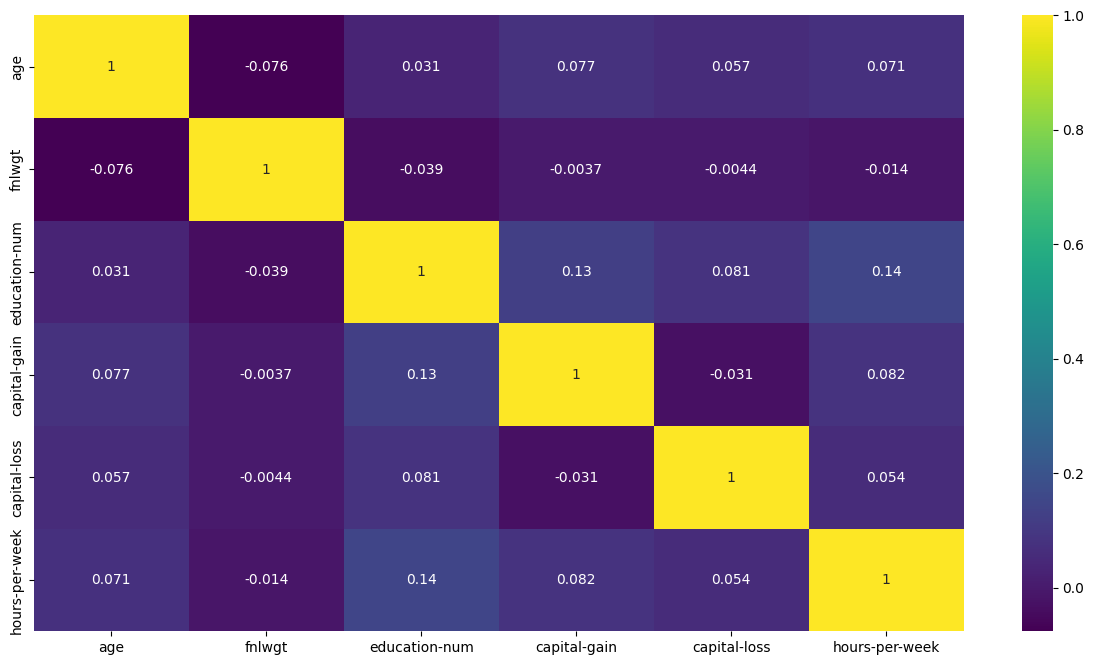

In [65]:
numericvalues = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 8))
sns.heatmap(numericvalues.corr(), annot=True, cmap="viridis")

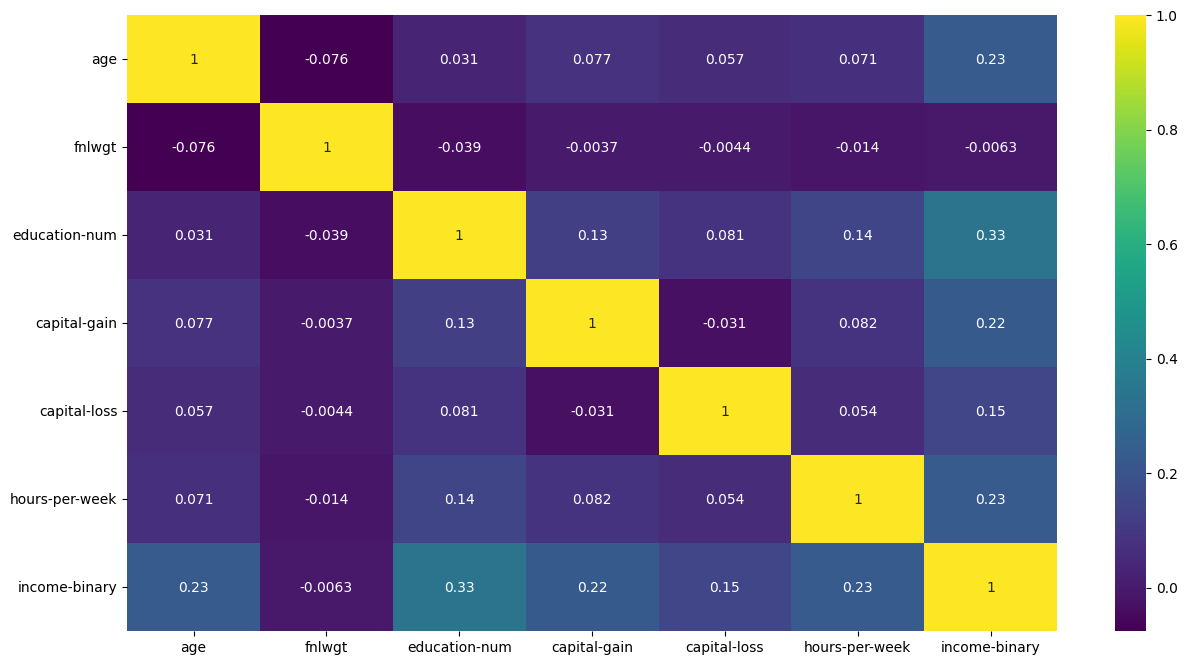

In [66]:
#Convert 'income' column into binary values
df['income-binary'] = np.where(df['income'] == '>50K', 1, 0)

#Select columns containing numerical data, including the newly created 'income-binary' column
numericvalueswithincome = df.select_dtypes(include=[np.number])

#Plot correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numericvalueswithincome.corr(), annot=True, cmap="viridis")
plt.show()

In [67]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-binary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K,0


In [68]:
#Drop 'income-binary' column
df.drop(columns=['income-binary'], inplace=True)

In [69]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K


Given the weak correlation (-0.0063) between the 'fnlwgt' column and the 'income' column (as shown by the correlation heatmap), remove this column from the dataframe.

In [70]:
# Remove 'fnlwgt' column from dataframe
df.drop(columns=['fnlwgt'], inplace=True)

In [71]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,state-gov,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K


#Handling Outliers

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

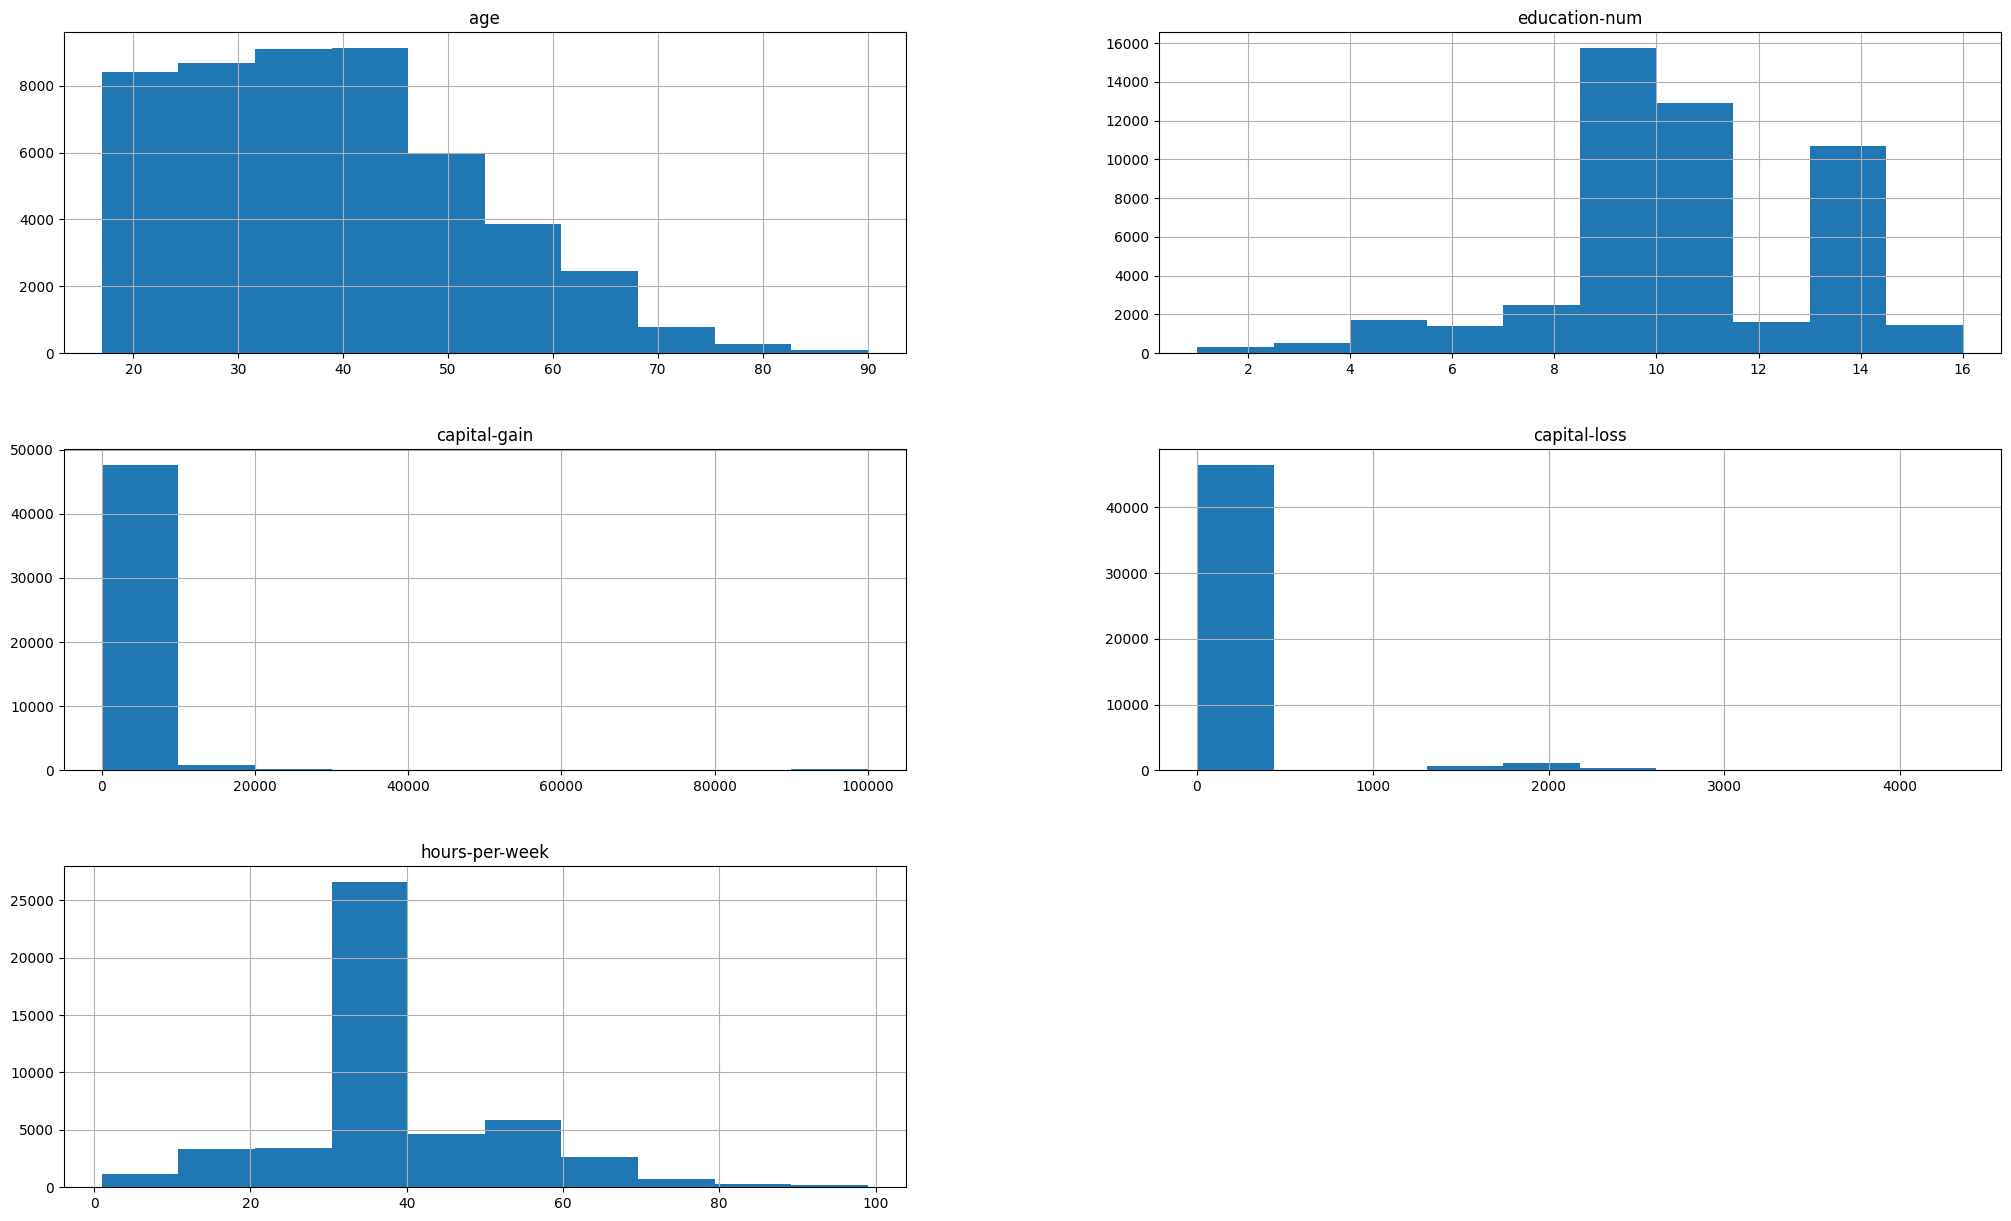

In [72]:
df.hist(figsize=(25, 15))

Handle 'age' column outliers

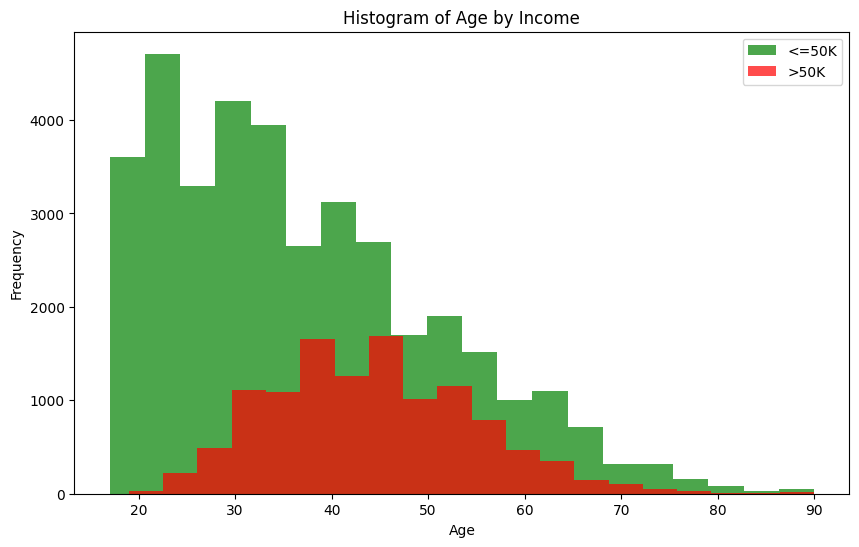

In [74]:
#Colors
lessthan50color = 'green'
greaterthan50color = 'red'

#Plot 'age' column histogram by income
plt.figure(figsize=(10, 6))
plt.hist(df[df['income'] == '<=50K']['age'], bins=20, color=lessthan50color, alpha=0.7, label='<=50K')
plt.hist(df[df['income'] == '>50K']['age'], bins=20, color=greaterthan50color, alpha=0.7, label='>50K')
plt.title('Histogram of Age by Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [75]:
df['age'].describe()

count    48789.000000
mean        38.652647
std         13.708593
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The income distribution in the age column is right-skewed for both incomes over and below $50,000.

Before handeling outliers

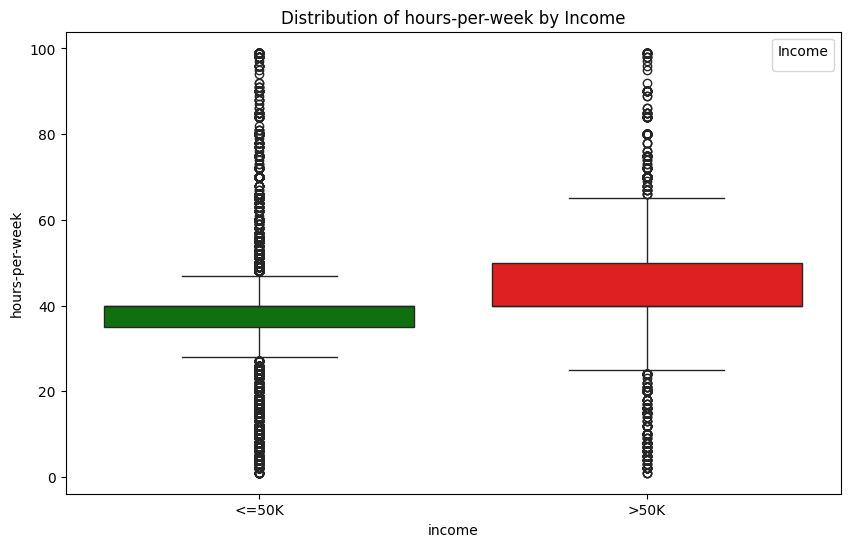

In [76]:
#Colors
lessthan50color = 'green'
greaterthan50color = 'red'

#Create box plot for "hours-per-week" column with hue for 'income' coloumn
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["hours-per-week"], x=df["income"], hue=df["income"], palette={'>50K': greaterthan50color, '<=50K': lessthan50color})
plt.title("Distribution of hours-per-week by Income")
plt.ylabel("hours-per-week")
plt.xlabel("income")
plt.legend(title='Income', loc='upper right')
plt.show()

In [ ]:
#Remove outliers of Hours_per_Week column which Income >50K

In [80]:
#Remove outliers of 'hours-per-week' column which Income >50K

#Select 'hours-per-week' data for income >50k
hoursgreaterthan50 =df[df['income'] == '>50K']['hours-per-week']

#Calculate IQR
Q1 = hoursgreaterthan50 .quantile(0.25)
Q3 = hoursgreaterthan50 .quantile(0.75)
IQR = Q3 - Q1

#Lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

Lower limit: 25.0
Upper limit: 65.0


In [81]:
#Find rows in DataFrame where 'hours-per-week' is less than lower bound and income is more than $50,000.
outliersgreaterthan50hoursperweeklower = df[(df['income'] == '>50K') & (df['hours-per-week'] < lower_bound)]

#Find rows in DataFrame where 'hours-per-week' exceeds the upper bound and income is more than $50,000.
outliersgreaterthan50hoursperweekupper = df[(df['income'] == '>50K') & (df['hours-per-week'] > upper_bound)]

print("Rows having income > $50,000 and hours per week < lower bound:", len(outliersgreaterthan50hoursperweeklower))
print("Rows having income >$50,000 and hours per week > upper bound:", len(outliersgreaterthan50hoursperweekupper))

Rows having income > $50,000 and hours per week < lower bound: 345
Rows having income >$50,000 and hours per week > upper bound: 436


In [83]:
#Cap outliers at lower bound value (rounded up to nearest whole number)
df.loc[(df['income'] == '>50K') & (df['hours-per-week'] < lower_bound), 'hours-per-week'] = math.ceil(lower_bound)

#Cap outliers at upper bound value for income >50K and Hours_per_Week > upper bound
df.loc[(df['income'] == '>50K') & (df['hours-per-week'] > upper_bound), 'hours-per-week'] = int(upper_bound)

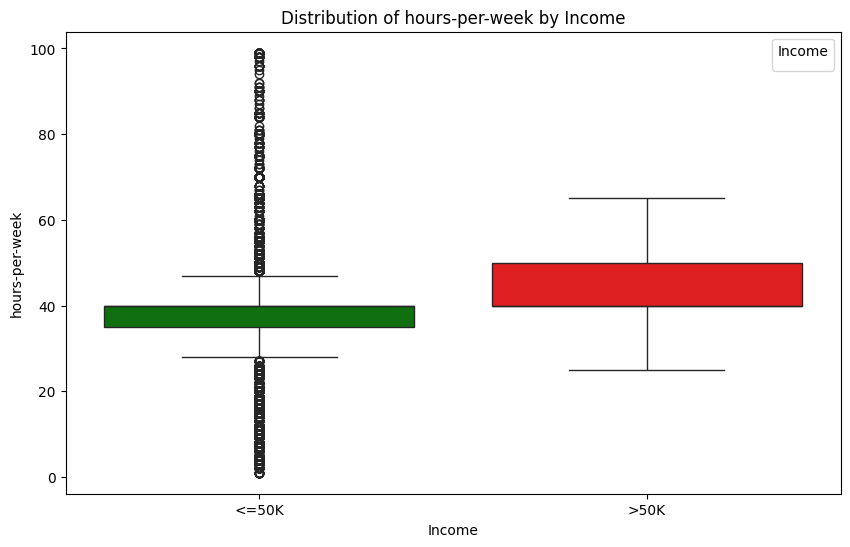

In [84]:
#After handeling outliers
#Colors
lessthan50color = 'green'
greaterthan50color = 'red'

#Create box plot for "hours-per-week" column with hue for income group
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["hours-per-week"], x=df["income"], hue=df["income"], palette={'>50K': greaterthan50color, '<=50K': lessthan50color})
plt.title("Distribution of hours-per-week by Income")
plt.ylabel("hours-per-week")
plt.xlabel("Income")
plt.legend(title='Income', loc='upper right')
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       48789 non-null  object
 2   education       48789 non-null  object
 3   education-num   48789 non-null  int64 
 4   marital-status  48789 non-null  object
 5   occupation      48789 non-null  object
 6   relationship    48789 non-null  object
 7   race            48789 non-null  object
 8   sex             48789 non-null  object
 9   capital-gain    48789 non-null  int64 
 10  capital-loss    48789 non-null  int64 
 11  hours-per-week  48789 non-null  int64 
 12  native-country  48789 non-null  object
 13  income          48789 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.6+ MB


# Data Type Conversion

In [86]:
#Convert categorical columns to categorical data type
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48789 non-null  int64   
 1   workclass       48789 non-null  category
 2   education       48789 non-null  category
 3   education-num   48789 non-null  int64   
 4   marital-status  48789 non-null  category
 5   occupation      48789 non-null  category
 6   relationship    48789 non-null  category
 7   race            48789 non-null  category
 8   sex             48789 non-null  category
 9   capital-gain    48789 non-null  int64   
 10  capital-loss    48789 non-null  int64   
 11  hours-per-week  48789 non-null  int64   
 12  native-country  48789 non-null  category
 13  income          48789 non-null  category
dtypes: category(9), int64(5)
memory usage: 2.7 MB


#Encoding Categorical Columns

To convert categorical labels into numerical labels, use LabelEncoder.

In [89]:
from sklearn.preprocessing import LabelEncoder

#Define the categorical columns
categoricalcolumns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

#Set up LabelEncoder
labelencoder = LabelEncoder()

#Loop through each categorical column and encode its values
for col in categoricalcolumns:
    df[col] = labelencoder.fit_transform(df[col])

In [91]:
#Label encoders for each categorical columns

#Define the categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

#Set up LabelEncoder
labelencoder = LabelEncoder()

#Loop through each categorical column and encode its values
for col in categoricalcolumns:
    df[col] = labelencoder.fit_transform(df[col])
    print(f"Encoded labels for column '{col}': {labelencoder.classes_}")

Encoded labels for column 'workclass': [0 1 2 3 4 5 6 7]
Encoded labels for column 'education': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Encoded labels for column 'marital-status': [0 1 2 3 4 5 6]
Encoded labels for column 'occupation': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Encoded labels for column 'relationship': [0 1 2 3 4 5]
Encoded labels for column 'race': [0 1 2 3 4]
Encoded labels for column 'sex': [0 1]
Encoded labels for column 'native-country': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Encoded labels for column 'income': [0 1]


In [92]:
# Define the categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

#Set up LabelEncoder
labelencoder = LabelEncoder()

#Loop through each categorical column and encode its values
for col in categorical_columns:
    df[col] = labelencoder.fit_transform(df[col])
    if col == 'income':
        print(f"index 0 represents the '{labelencoder.inverse_transform([0])[0]}' class, and the label with index 1 represents the '{labelencoder.inverse_transform([1])[0]}' class")


index 0 represents the '0' class, and the label with index 1 represents the '1' class


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48789 non-null  int64
 1   workclass       48789 non-null  int64
 2   education       48789 non-null  int64
 3   education-num   48789 non-null  int64
 4   marital-status  48789 non-null  int64
 5   occupation      48789 non-null  int64
 6   relationship    48789 non-null  int64
 7   race            48789 non-null  int64
 8   sex             48789 non-null  int64
 9   capital-gain    48789 non-null  int64
 10  capital-loss    48789 non-null  int64
 11  hours-per-week  48789 non-null  int64
 12  native-country  48789 non-null  int64
 13  income          48789 non-null  int64
dtypes: int64(14)
memory usage: 5.6 MB


In [94]:
#Check encoded labels for 'income' column
incomelabels = labelencoder.classes_
print(incomelabels)

[0 1]


In [95]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0


#Check Correlation

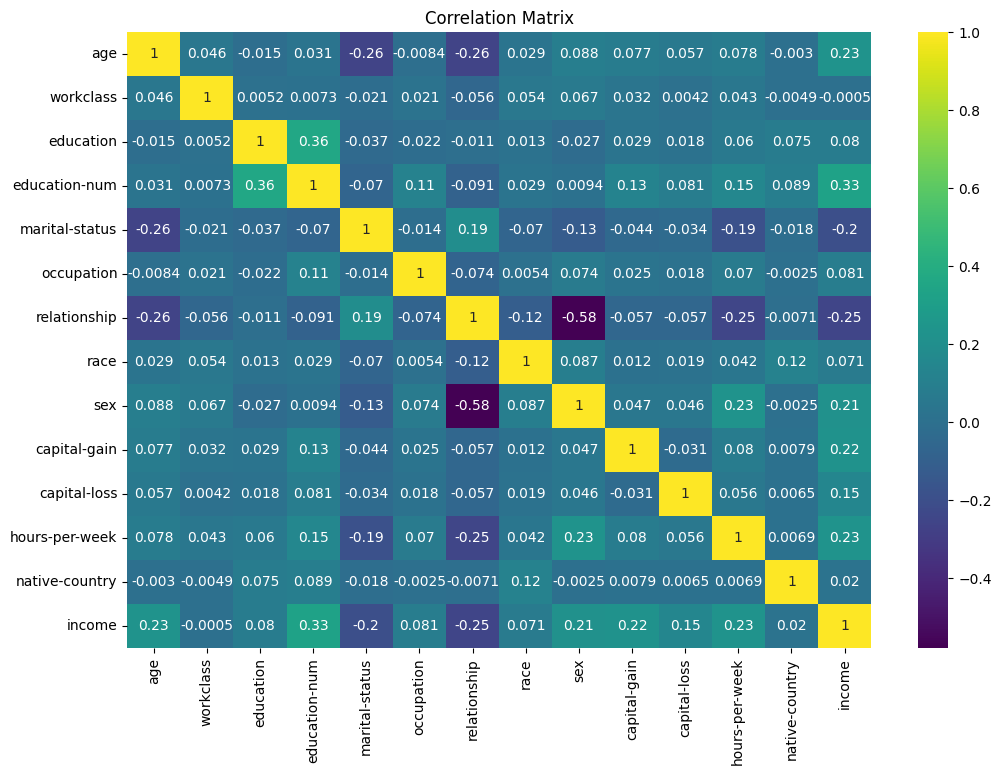

In [96]:
#Calculate correlation matrix
correlationmatrix = df.corr()

#Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlationmatrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [97]:
#Calculate correlation matrix
correlationmatrix = df.corr()

#Extract correlation with target variable
correlationwithincome = correlationmatrix['income'].sort_values(ascending=False)

print(correlationwithincome)

income            1.000000
education-num     0.332829
age               0.230132
hours-per-week    0.229645
capital-gain      0.223060
sex               0.214703
capital-loss      0.147554
occupation        0.080864
education         0.080114
race              0.070958
native-country    0.020152
workclass        -0.000504
marital-status   -0.198846
relationship     -0.253277
Name: income, dtype: float64


#Remove irrelevant features

In [101]:
columnstoremove = ['workclass', 'education', 'race', 'native-country']

#Drop columns from DataFrame
df.drop(columns=columnstoremove, inplace=True)

KeyError: "['workclass', 'education', 'race', 'native-country'] not found in axis"

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48789 non-null  int64
 1   education-num   48789 non-null  int64
 2   marital-status  48789 non-null  int64
 3   occupation      48789 non-null  int64
 4   relationship    48789 non-null  int64
 5   sex             48789 non-null  int64
 6   capital-gain    48789 non-null  int64
 7   capital-loss    48789 non-null  int64
 8   hours-per-week  48789 non-null  int64
 9   income          48789 non-null  int64
dtypes: int64(10)
memory usage: 4.1 MB


# Feature Scaling

In [103]:
#For feature scaling, apply standardization (Z-score normalization)
scaler = StandardScaler()

#Features
columnstoscale = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#Apply Standardization to the specified columns
df[columnstoscale] = scaler.fit_transform(df[columnstoscale])

In [104]:
df.head()

,age,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,0.025339,1.136624,4,0,1,1,0.146697,-0.217251,-0.031988,0
1,0.827763,1.136624,2,3,0,1,-0.144884,-0.217251,-2.292009,0
2,-0.047609,-0.419771,0,5,1,1,-0.144884,-0.217251,-0.031988,0
3,1.046606,-1.197969,2,5,0,1,-0.144884,-0.217251,-0.031988,0
4,-0.777086,1.136624,2,9,5,0,-0.144884,-0.217251,-0.031988,0


# Train model

In [108]:
#Separate features and target variable
X = df.drop(columns=['income'])
y = df['income']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
#Naïve Bayes Classification
nbclassifier = GaussianNB()

#Train NBC on the resampled training data
nbclassifier.fit(X_train, y_train)

#Prediction
y_pred_nb = nbclassifier.predict(X_test)

In [110]:
#Evaluate NBC

#Calculate test data accuracy for NBC
testaccuracynbc = accuracy_score(y_test, y_pred_nb) * 100
print("Test data accuracy for Naive Bayes:", testaccuracynbc)

#Calculate train data accuracy for NBC
trainaccuracynbc = accuracy_score(y_train, nbclassifier.predict(X_train)) * 100
print("Train data accuracy for Naive Bayes:", trainaccuracynbc)


Test data accuracy for Naive Bayes: 79.2273006763681
Train data accuracy for Naive Bayes: 80.15936050831391


In [111]:
#Random Forest Classification
rfclassifier = RandomForestClassifier(random_state=42)

#Train RFC on resampled training data
rfclassifier.fit(X_train, y_train)

#Prediction
y_pred_rf = rfclassifier.predict(X_test)

In [112]:
#Evaluate RFC

#Calculate test data accuracy for RFC
testaccuracyrfc = accuracy_score(y_test, y_pred_rf) * 100
print("Test data accuracy for RFC:", testaccuracyrfc)

#Calculate train data accuracy for RFC
trainaccuracyrfc = accuracy_score(y_train, rfclassifier.predict(X_train)) * 100
print("Train data accuracy for RFC:", trainaccuracyrfc)

Test data accuracy for RFC: 85.36585365853658
Train data accuracy for RFC: 95.46258102533884


#Classification report

In [115]:
#Generate classification report for NBC
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:")
print(nb_classification_report)

#Generate classification report for RFC
rf_classification_report = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest Classifier:")
print(rf_classification_report)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7360
           1       0.67      0.30      0.42      2398

    accuracy                           0.79      9758
   macro avg       0.74      0.63      0.65      9758
weighted avg       0.77      0.79      0.76      9758


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7360
           1       0.74      0.63      0.68      2398

    accuracy                           0.85      9758
   macro avg       0.81      0.78      0.79      9758
weighted avg       0.85      0.85      0.85      9758



#Confusion Matrix

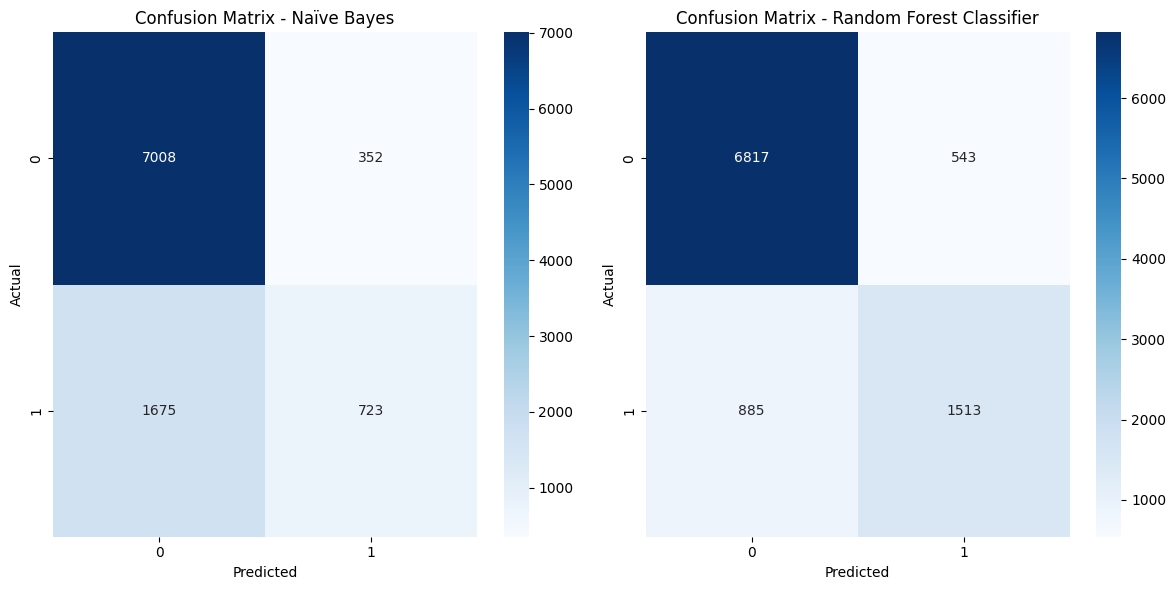

In [116]:
# Create confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()